In [29]:
import numpy as np 
import matplotlib.pyplot as plt
import sympy 

import pandas as pd

In [30]:
sp= pd.read_csv('prof_ibm.csv', sep=',',header=None)
sp.head()

,0,1
0,1,0
1,2,1
2,3,1
3,4,1
4,5,1


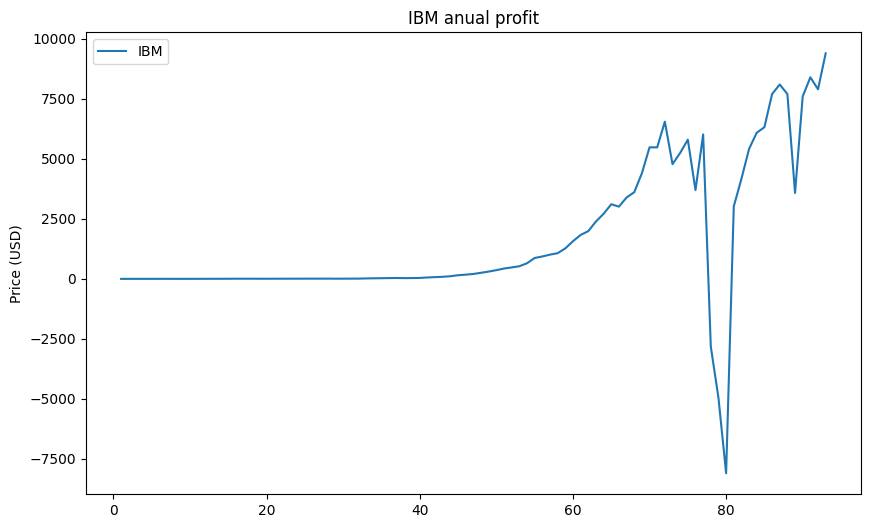

In [31]:

#plot the data
plt.figure(figsize=(10,6))
plt.plot(sp[0], sp[1], label='IBM')
plt.title('IBM anual profit')
plt.ylabel('Price (USD)')
plt.legend(loc='upper left')
plt.savefig("3_profit.png")
plt.show()


In [32]:
ar= pd.read_csv('groibm.csv', sep=',',header=None)
ar.head()

,0,1,2
0,9,1346,1
1,4,1672,2
2,6,2529,3
3,8,3063,4
4,9,3127,5


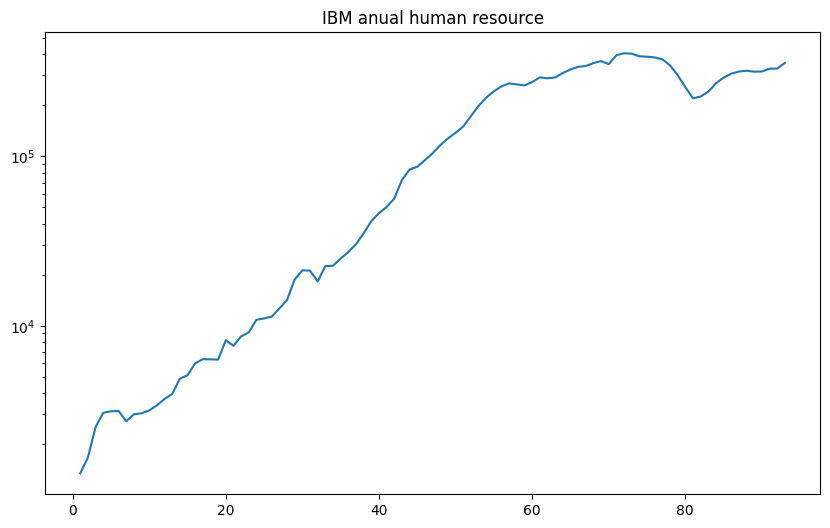

In [33]:
plt.figure(figsize=(10,6))
plt.plot(ar[2], ar[1], label='IBM')
plt.yscale('log')
plt.title('IBM anual human resource')
plt.show()

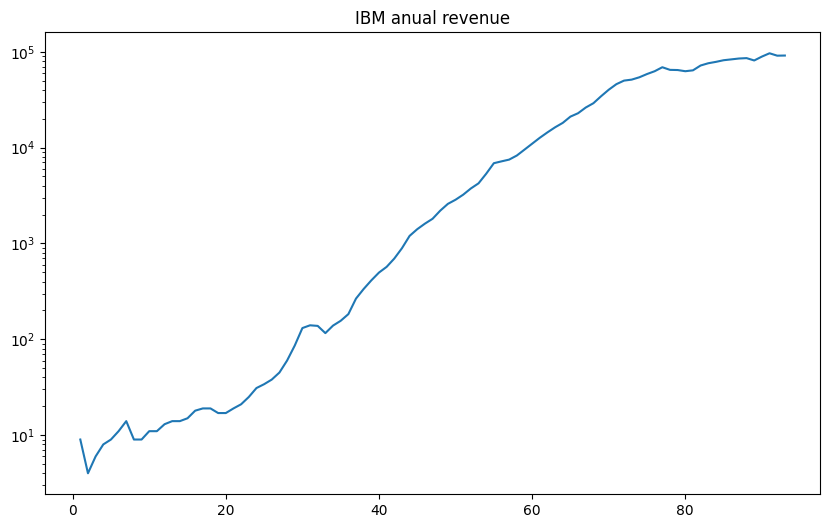

In [34]:
plt.figure(figsize=(10,6))
plt.plot(ar[2], ar[0], label='IBM')
#make the y axis logarithmic
plt.yscale('log')
plt.title('IBM anual revenue')
plt.show()

In [35]:
# revenue modeling
def logictic_m(k,t,a,x0):
    return k*x0*np.exp(a*t)/(k+x0*(np.exp(a*t)-1))

In [36]:
def find_x0(k,t,a,xt):
    return -1*xt*k/(xt*(np.exp(a*t)-1) - k*np.exp(a*t))

In [37]:
x01= find_x0(100000,1,0.145,9)
x01

7.785295213713258

In [38]:
revenue_model = logictic_m(100000,ar[2],0.145,2)

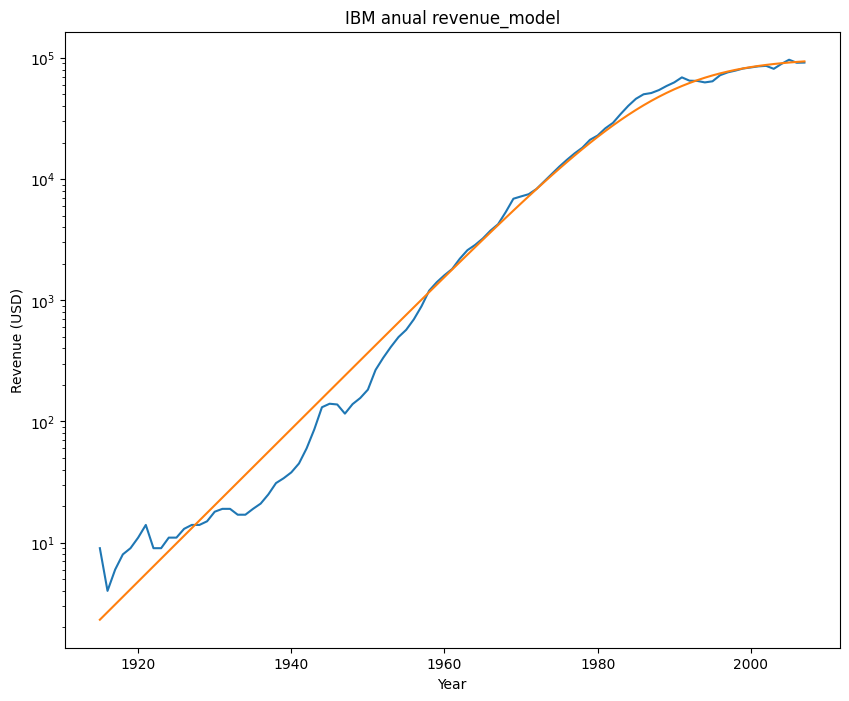

In [39]:
plt.figure(figsize=(10,8))
plt.plot(ar[2]+1914, ar[0], label='IBM')
plt.plot(ar[2]+1914, revenue_model, label='IBM')
#make the y axis logarithmic
plt.yscale('log')
plt.title('IBM anual revenue_model')
plt.ylabel('Revenue (USD)')
plt.xlabel('Year')
plt.savefig('1_annual_rev.png')
plt.show()


In [40]:
human_resource_model = logictic_m(500000,ar[2],0.09,1200)

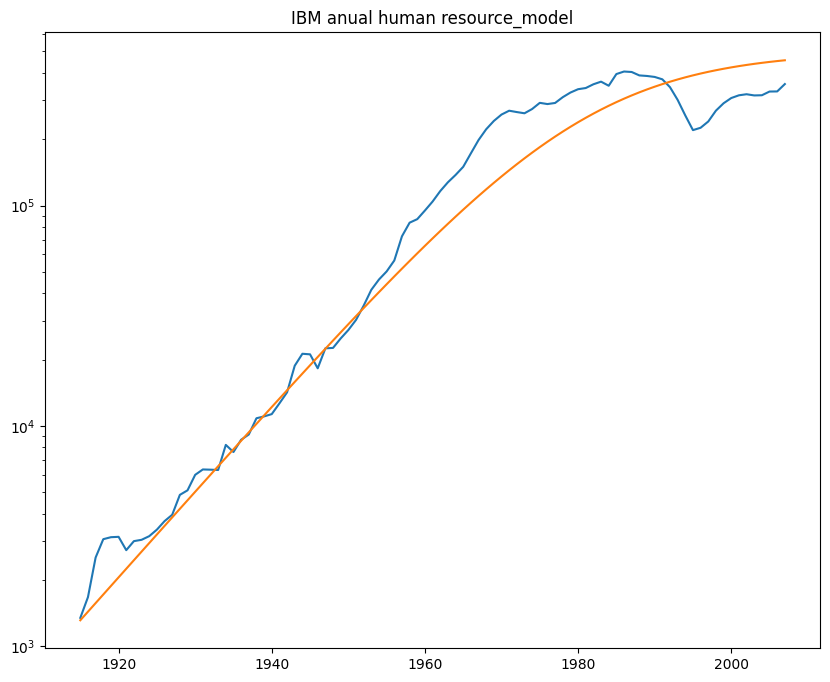

In [41]:
plt.figure(figsize=(10,8))  
plt.plot(ar[2]+1914, ar[1], label='IBM')
plt.plot(ar[2]+1914, human_resource_model, label='IBM')
plt.yscale('log')
plt.title('IBM anual human resource_model')
plt.savefig('2_hrcount.png')
plt.show()

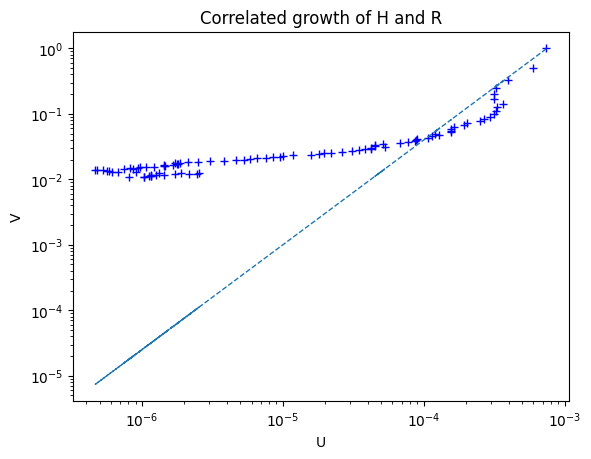

In [45]:
kh=500000
kr=100000
b=1.6

U = 1/ar[1] - 1/kh
V = 1/ar[2] - 1/kr
plt.scatter(U,V,marker='+',lw=1,color='blue')

V_simulated = np.power(U,b)
plt.plot(U,kr*V_simulated,linestyle='dashed',lw=1)
plt.yscale('log')
plt.xscale('log')
plt.title('Correlated growth of H and R')
plt.xlabel('U')
plt.ylabel('V')
plt.show()